# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
# create symlink pointing to utils.py in project subfolder
!ln -s project/utils.py utils.py

ln: failed to create symbolic link 'utils.py': File exists


In [2]:
from utils import get_dataset
from glob import glob
from random import choice

# return a list with all .tfrecord files in folder
def make_data_path(path_to_tfrecords="project/data/processed/"):
    return glob(path_to_tfrecords + "*.tfrecord")

# load a random dataset from the input path
def load_random_dataset(path_to_tfrecords="project/data/processed/", label_map="project/label_map.pbtxt"):
    processed_files = make_data_path(path_to_tfrecords)
    dataset_path = choice(processed_files)
    dataset = get_dataset(dataset_path, label_map=label_map)
    print(f"Loaded {dataset_path.split('/')[-1]}")
    return dataset

# load a specific dataset
def load_dataset(file_path, label_map="project/label_map.pbtxt"):
    return get_dataset(file_path, label_map=label_map)

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

%matplotlib inline

def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """

    colormap = {"vehicle": (1,0,0), "pedestrian": (0,0,1), "cyclist": (0,1,0)}

    # calculate size of figure dependent on batch size
    n_images = len(batch)
    n_rows = n_images//2
    n_cols = 2

    dpi = 96
    f_width = 1.35 * 640 / dpi * n_rows
    f_height = 1.45 * 640 / dpi * n_cols
    
    f, ax = plt.subplots(n_rows , n_cols, figsize=(f_height, f_width))

    for i, sample in enumerate(batch):
        x = i % n_images//2
        y = i % 2    
        if n_rows == 1:
            idx = y
        else:
            idx = (x,y)
        ax[idx].imshow(sample["image"])
        label_map = {1:"vehicle", 2:"pedestrian", 4:"cyclist"}
        for cl, bbox in zip(sample["groundtruth_classes"].numpy(), 640 * sample["groundtruth_boxes"].numpy()):
            object_class = label_map[cl]
            y1, x1, y2, x2 = bbox   
            rec = Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none', 
                                edgecolor=colormap[object_class])
            ax[idx].add_patch(rec)

        ax[idx].set_title(sample["filename"].numpy().decode("utf-8").split(".")[0], wrap=True)
        ax[idx].axis('off')
        plt.tight_layout()
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

INFO:tensorflow:Reading unweighted datasets: ['project/data/processed/segment-10485926982439064520_4980_000_5000_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['project/data/processed/segment-10485926982439064520_4980_000_5000_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


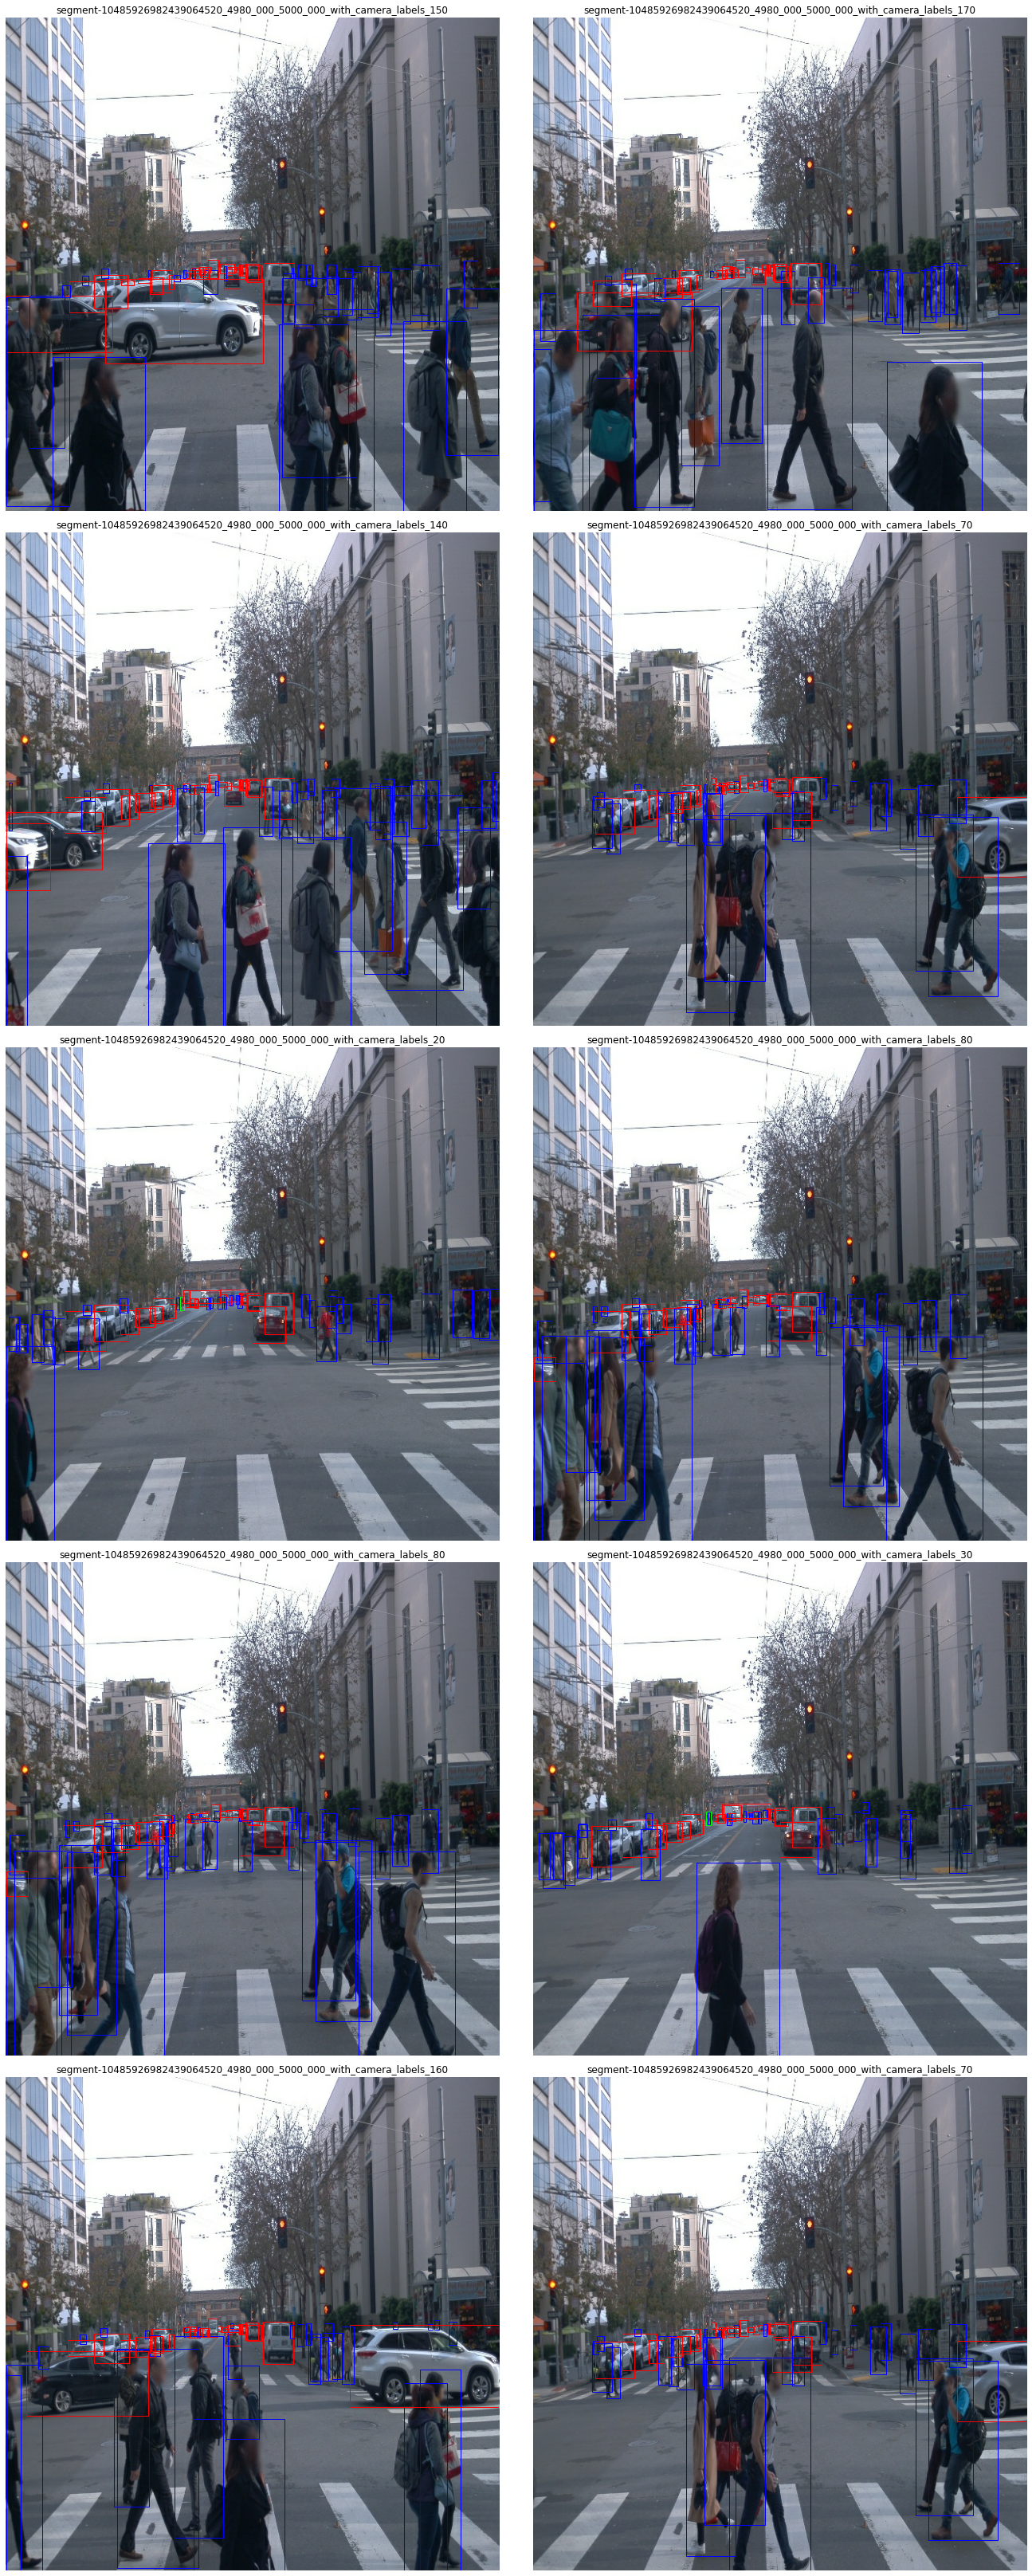

In [4]:
# pick a batch from the dataset
# dataset = load_random_dataset()
# dataset = load_dataset("project/data/processed/segment-11839652018869852123_2565_000_2585_000_with_camera_labels.tfrecord") # highway scene
# dataset = load_dataset("project/data/processed/segment-1191788760630624072_3880_000_3900_000_with_camera_labels.tfrecord") # suburban scene
dataset = load_dataset("project/data/processed/segment-10485926982439064520_4980_000_5000_000_with_camera_labels.tfrecord") # urban with cyclist and lots of pedestrians
batch_size = 10
dataset.shuffle(buffer_size=1)
batch = [iter(dataset).get_next() for x in range(batch_size)]
display_instances(batch)

In [287]:
len(batch)

10

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [5]:
# Print all keys for a single sample to get an impression of the contained data
sample = iter(dataset).get_next()
for key, value in sample.items():
    if value.ndim < 2:
        if type(value.numpy()) == bytes:
            print(f"{key.ljust(35)}{value.numpy().decode()}")
        else:
            print(f"{key.ljust(35)}{value}")
    else:
        print(f"{key.ljust(35)}{value.ndim}d tensor")

image                              3d tensor
source_id                          segment-10485926982439064520_4980_000_5000_000_with_camera_labels_130.tfrecord
key                                
filename                           segment-10485926982439064520_4980_000_5000_000_with_camera_labels_130.tfrecord
groundtruth_image_confidences      []
groundtruth_verified_neg_classes   []
groundtruth_not_exhaustive_classes []
groundtruth_boxes                  2d tensor
groundtruth_area                   []
groundtruth_is_crowd               []
groundtruth_difficult              []
groundtruth_group_of               []
groundtruth_weights                [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
groundtruth_classes                [2 1 2 1 2 1 1 2 2 1 1 2 1 1 2 2 2 2 1 1 2 2 2 2 1 2 1 2 1 2 1 1 2 2 1 1 2
 2 2 1 1 2 2 2 1 1 2 2 2 1 2 1 2 2 2 1 1 2]
groundtruth_i

In [23]:
# generate statistics of label distribution over whole dataset
import collections
import pandas as pd
import logging
import os
import time

# get a list with all .tfrecord files
data_path = make_data_path()

# silence TF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

# number of samples (frames) to be taken from each .tfrecord
n_samples = 10

file_names = []
vehicle_avg_file = []
pedestrian_avg_file = []
cyclist_avg_file = []
sample_count_file = []

# Processing all frames from a single data file is expensive therefor draw n_samples and compute metrics
for file in data_path:
    file_name = file.split('/')[-1]
    dataset = get_dataset(file, label_map="project/label_map.pbtxt")
    dataset.shuffle(buffer_size=1)
    
    vehicle_count = []
    pedestrian_count = []
    cyclist_count = []

    start_time = time.time()
    for i in range(n_samples):
        try:
            sample = iter(dataset).get_next()
            vehicle_count.append(collections.Counter(sample["groundtruth_classes"].numpy())[1])
            pedestrian_count.append(collections.Counter(sample["groundtruth_classes"].numpy())[2])
            cyclist_count.append(collections.Counter(sample["groundtruth_classes"].numpy())[4])
        except StopIteration:
            elapsed = time.time() - start_time
            sample_count = i+1
            print(f"Finised reading \t {file_name} with {sample_count} samples after {elapsed:.2f}s. (EOF)")
            break
    elapsed = time.time() - start_time
    sample_count = i+1
    print(f"Finished reading {file_name} after {sample_count} samples within {elapsed:.2f}s. (limit exceeded)")
    file_names.append(file_name)
    vehicle_avg_file.append(sum(vehicle_count) / sample_count)
    pedestrian_avg_file.append(sum(pedestrian_count) / sample_count)
    cyclist_avg_file.append(sum(cyclist_count) / sample_count)
    sample_count_file.append(sample_count)
    
df = pd.DataFrame(list(zip(file_names, sample_count_file, vehicle_avg_file, pedestrian_avg_file, cyclist_avg_file)), \
columns=["filename", "n_samples", "vehicles_avg", "pedestrians_avg", "cyclists_avg"])
df.loc[:,"objects_avg"] = df.loc[:,"vehicles_avg"] + df.loc[:,"pedestrians_avg"] + df.loc[:,"cyclists_avg"]
df.loc[:,"vehicles_avg_norm"] = df.loc[:,"vehicles_avg"] / df.loc[:,"objects_avg"]
df.loc[:,"pedestrians_avg_norm"] = df.loc[:,"pedestrians_avg"] / df.loc[:,"objects_avg"]
df.loc[:,"cyclists_avg_norm"] = df.loc[:,"cyclists_avg"] / df.loc[:,"objects_avg"]

df.describe()

Finished reading segment-12027892938363296829_4086_280_4106_280_with_camera_labels.tfrecord after 10 samples within 2.71s. (limit exceeded)
Finished reading segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord after 10 samples within 2.74s. (limit exceeded)
Finished reading segment-10927752430968246422_4940_000_4960_000_with_camera_labels.tfrecord after 10 samples within 2.65s. (limit exceeded)
Finished reading segment-11928449532664718059_1200_000_1220_000_with_camera_labels.tfrecord after 10 samples within 3.39s. (limit exceeded)
Finished reading segment-11967272535264406807_580_000_600_000_with_camera_labels.tfrecord after 10 samples within 3.30s. (limit exceeded)
Finished reading segment-10750135302241325253_180_000_200_000_with_camera_labels.tfrecord after 10 samples within 3.25s. (limit exceeded)
Finished reading segment-10724020115992582208_7660_400_7680_400_with_camera_labels.tfrecord after 10 samples within 3.12s. (limit exceeded)
Finished reading segment

n_samples  vehicles_avg  pedestrians_avg  cyclists_avg  objects_avg  \
count      100.0    100.000000       100.000000    100.000000   100.000000   
mean        10.0     17.821000         5.309000      0.138000    23.268000   
std          0.0     11.708473         8.994185      0.293973    16.874851   
min         10.0      0.300000         0.000000      0.000000     0.900000   
25%         10.0      8.300000         0.000000      0.000000     8.800000   
50%         10.0     15.450000         0.900000      0.000000    20.250000   
75%         10.0     27.050000         7.075000      0.000000    34.250000   
max         10.0     50.600000        38.700000      1.200000    68.300000   

       vehicles_avg_norm  pedestrians_avg_norm  cyclists_avg_norm  
count         100.000000            100.000000         100.000000  
mean            0.832805              0.157481           0.009714  
std             0.210654              0.206854           0.030354  
min             0.155251              0.000000           0.000000  
25%             0.735117              0.000000           0.000000  
50%             0.933895              0.052122           0.000000  
75%             1.000000              0.260089           0.000000  
max             1.000000              0.821918           0.206897

Text(0, 0.5, 'Relative average class\n count per frame')

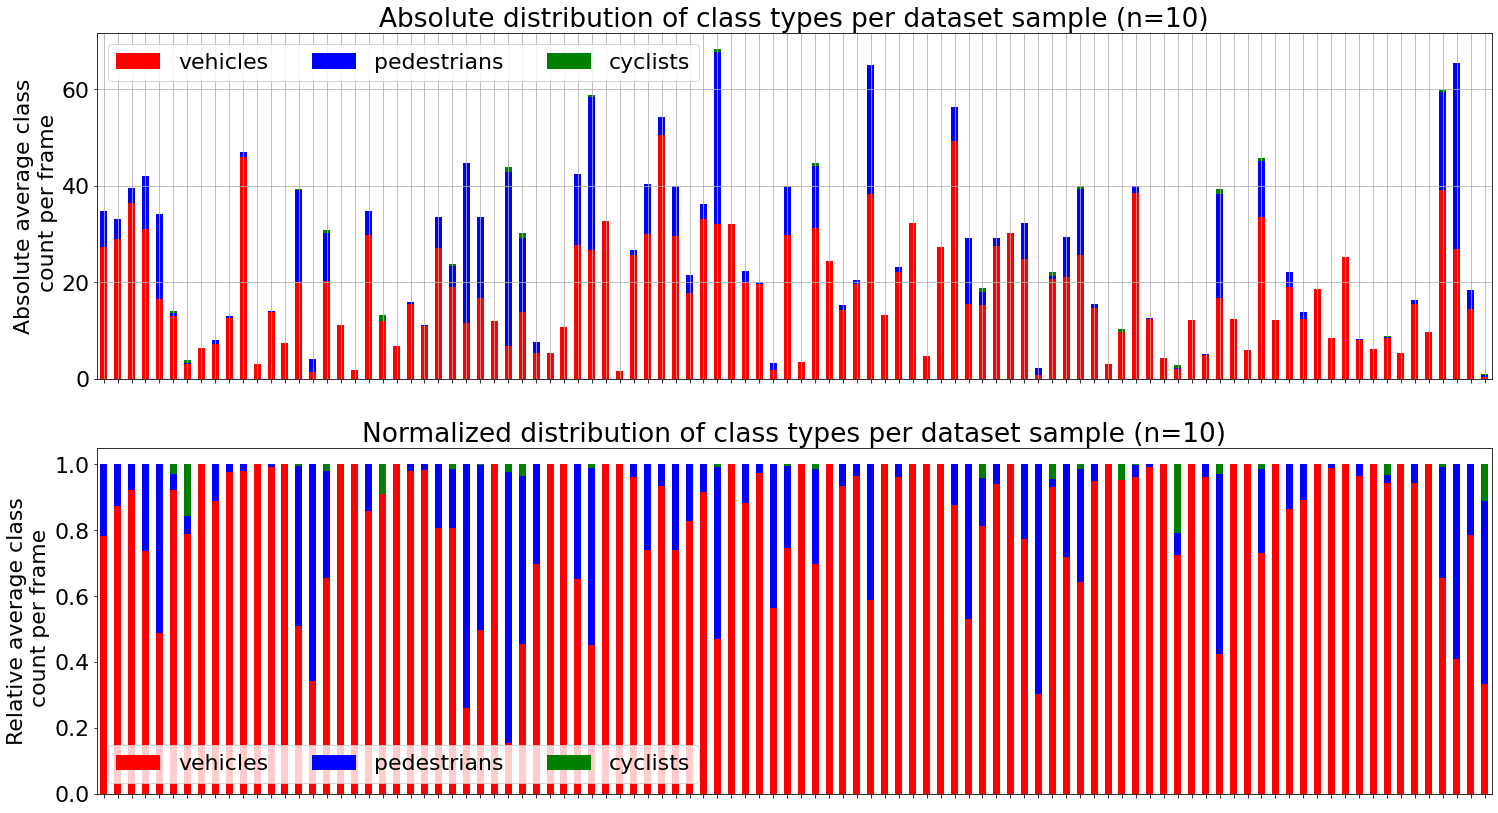

In [32]:
# plot the distribution of the classes
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
plt.rc('font', **font)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25,14))

df.loc[:,["vehicles_avg", "pedestrians_avg", "cyclists_avg"]].plot(kind='bar', ax = axes[0], stacked=True, color="rbg")
df.loc[:,["vehicles_avg_norm", "pedestrians_avg_norm", "cyclists_avg_norm"]].plot(kind='bar', ax = axes[1], stacked=True, color="rbg")

for ax in axes:
        # ax.set_xlabel("Individual dataset")
        ax.set_xticklabels([])
        
axes[0].legend(["vehicles", "pedestrians", "cyclists"], ncol=3, loc="upper left")
axes[1].legend(["vehicles", "pedestrians", "cyclists"], ncol=3, loc="lower left")

axes[0].grid()

axes[0].set_title(f"Absolute distribution of class types per dataset sample (n={n_samples})")
axes[0].set_ylabel("Absolute average class\n count per frame")
axes[1].set_title(f"Normalized distribution of class types per dataset sample (n={n_samples})")
axes[1].set_ylabel("Relative average class\n count per frame")
